# imports

In [2]:
from SEAM.utils import *
import SEAM
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
Using TensorFlow backend.


# settings

In [3]:
sns.set_style('white')
# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 2}

# matplotlib.rc('font', **font)
# matplotlib.rcParams.update({'font.size': 2})

import matplotlib.pyplot as plt

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# load

### load raw and segmented data from data/process/

In [3]:
# a = SEAM.datasets.load_dataset_raw('mouse0_liver0_neg1_high0_div15_None_ada')
a = SEAM.datasets.load_dataset_raw('20190103_lung3_filter')

In [16]:
cell_idx = a.uns['cell_idx'].copy()
cell_pos = a.uns['cell_pos'].copy()
IMS = a.uns['IMS'].copy()
train_x = a.uns['train_x'].copy()
matter_list = np.array(a.var_names).astype('float')

In [17]:
# HEG_87 = [87.36,59.31,69.32,71.34,101.41,221.56]
# mark_list = [284,260,275,267,310,335,373,378,383,382,380,377,365,340,322,309,212,224,139,341,535,51,
# 303,232,212,188,213,200,346,634,535,693,691,442,25,28,2,233,234,298,278,302,428,450]
ec_m = [60.28,61.28,62.29,76.31,77.31]
ec_cls = [568,750,738,364,527,322,270,214,679,882,558,284,693,554,553,527,754,891,182,852,849,372,322,341,47,87,48,14]


HEG_87 = ec_m
mark_list = ec_cls

scale_ratio = 3
HEG_87_idx = [np.where(matter_list==m)[0][0] for m in HEG_87]
train_x_tmp = train_x.copy()
for i in range(train_x.shape[0]):
    cur_cell_idx = cell_idx[i]-1
    if cur_cell_idx in mark_list:
        train_x_tmp[i,HEG_87_idx] = train_x_tmp[i,HEG_87_idx]*scale_ratio

In [197]:
IMS_old = IMS.copy()

In [18]:

# IMS[cell_pos-1,:][:,HEG_87_idx] = train_x_tmp[:,HEG_87_idx]
IMS[np.ix_(cell_pos-1,HEG_87_idx)] = train_x_tmp[:,HEG_87_idx]
# IMS[cell_pos-1,HEG_87_idx_bool] = train_x_tmp[:,HEG_87_idx]

In [19]:
a.uns['IMS'] = IMS.astype('int')

In [20]:
a.uns['train_x'] = train_x_tmp.astype('int')

In [4]:
a.write_h5ad('../../data/raw/mouse_lung_raw.h5ad')

### display raw ion image data

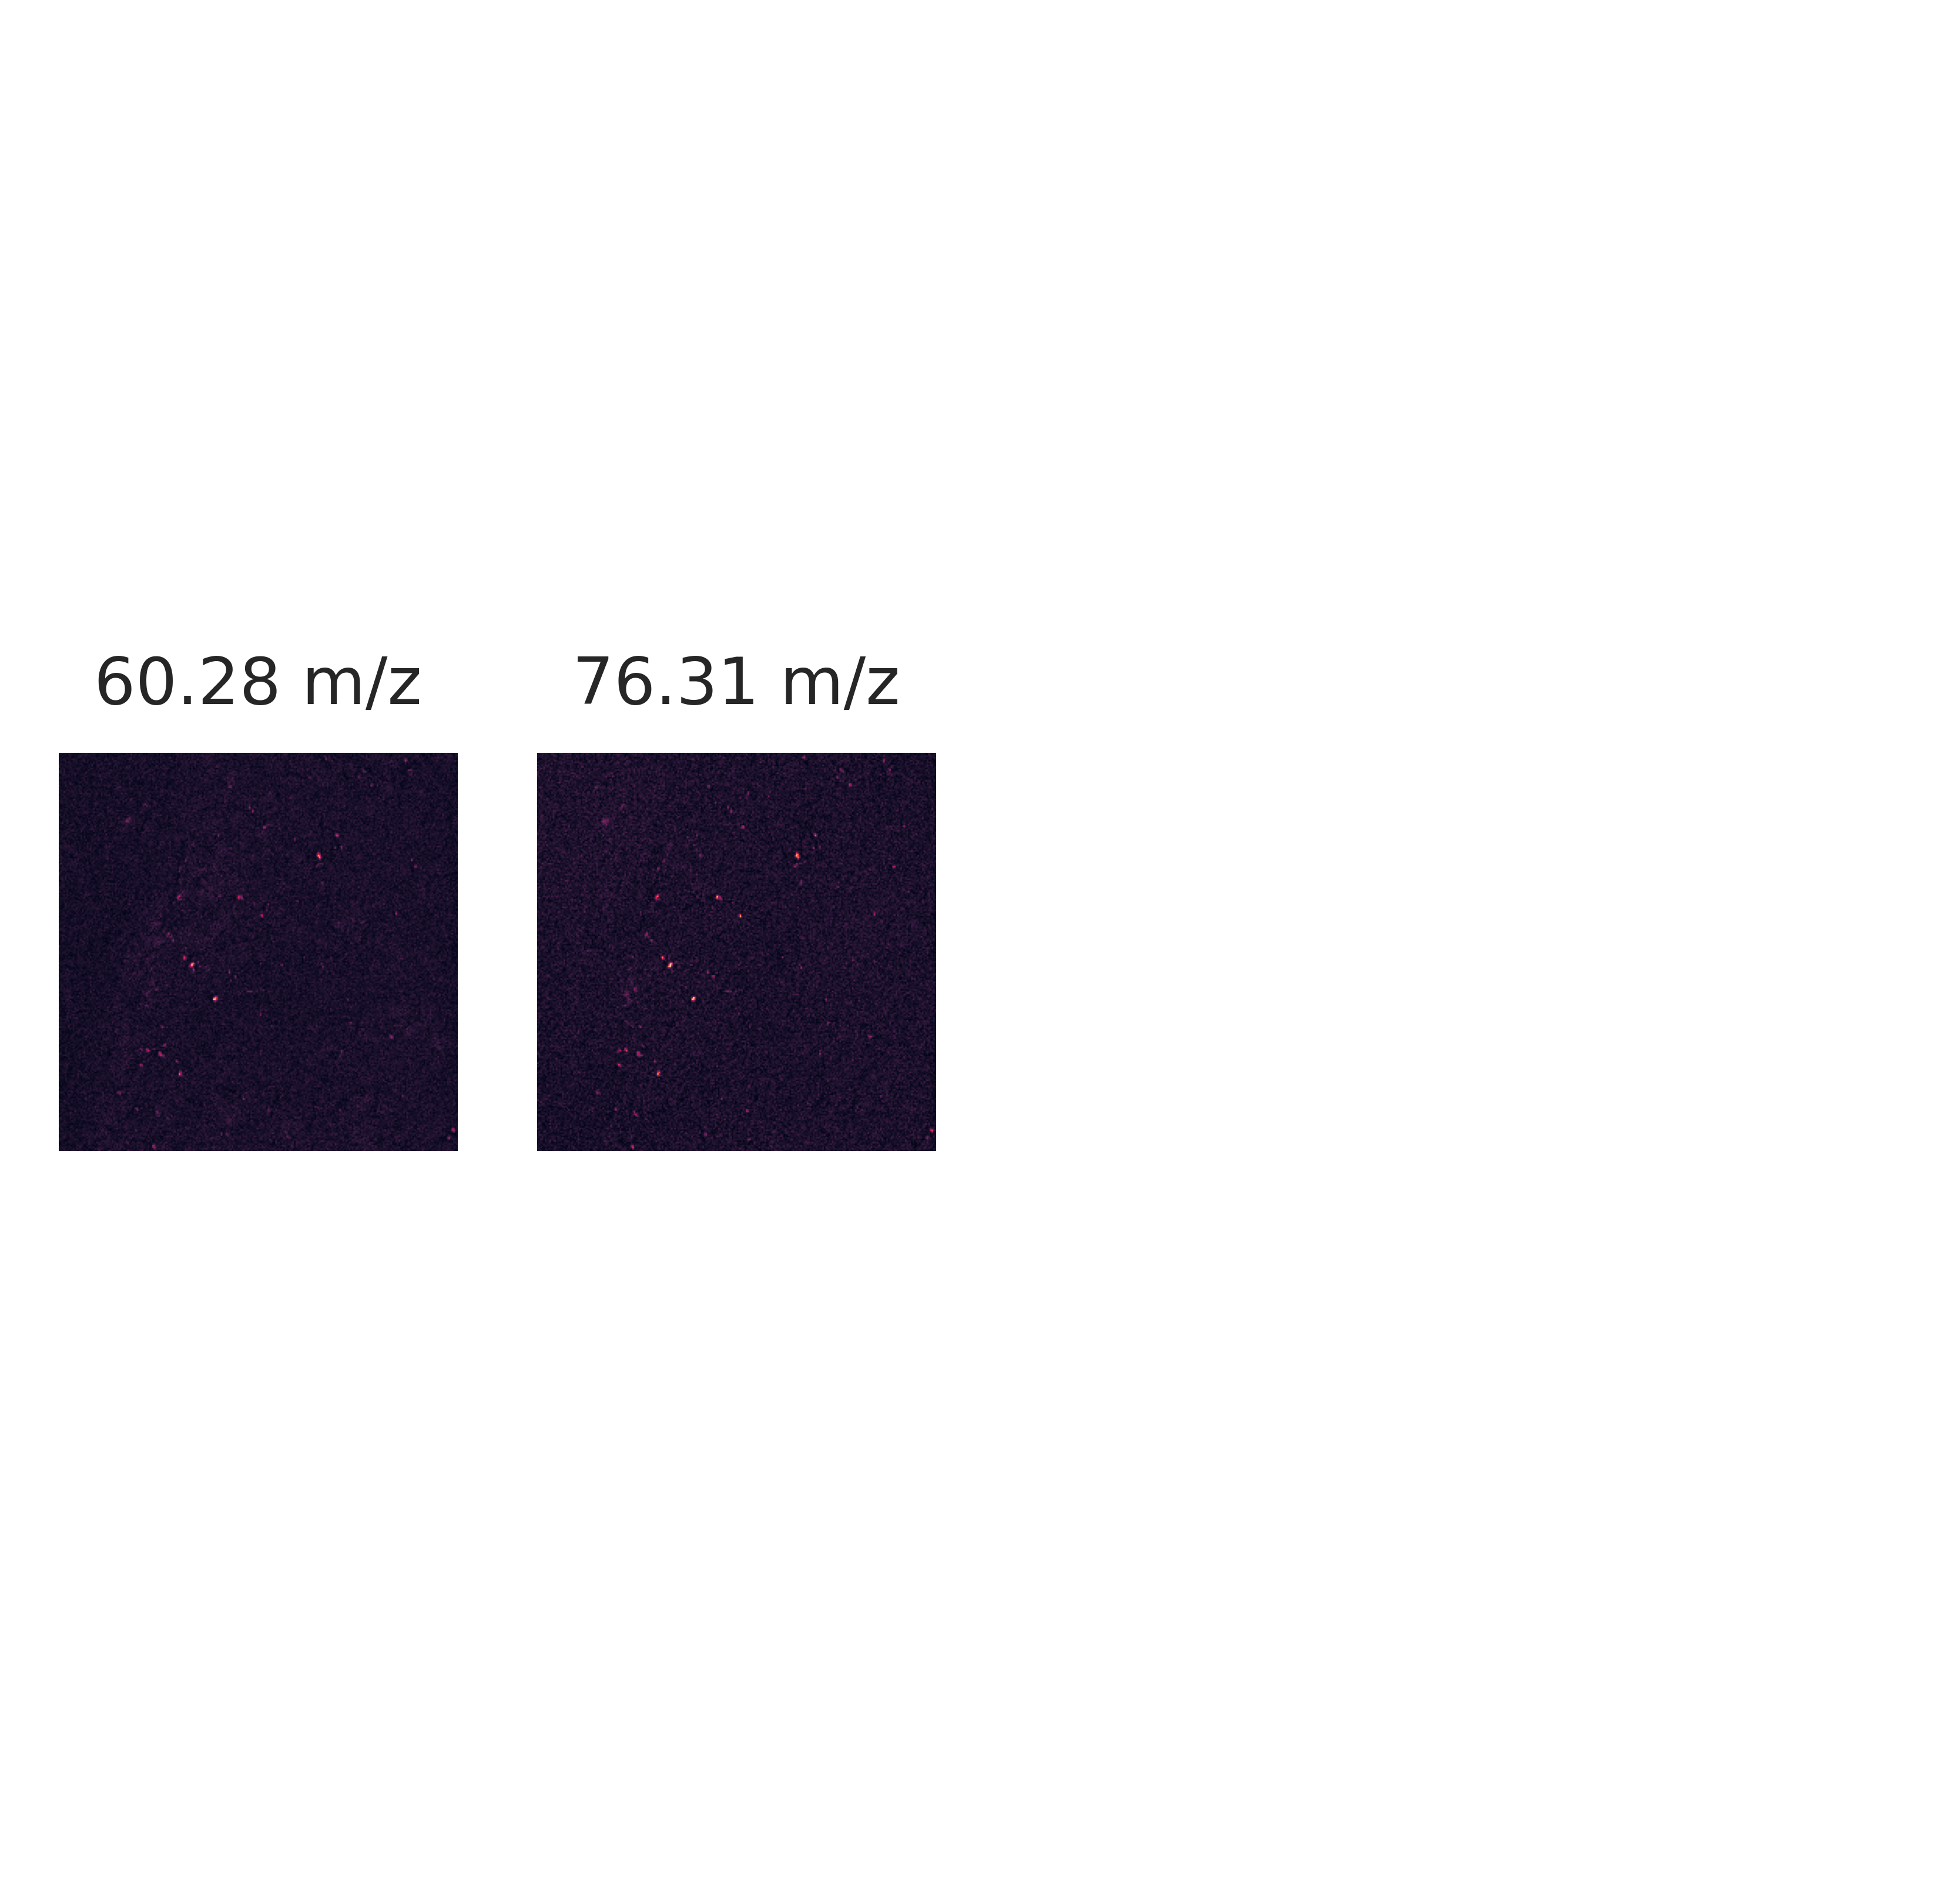

In [22]:
SEAM.pl.IMS(a,['60.28','76.31'],n_cols=4)

# View

### run SIMS-View with DR_method=Umap

In [5]:
a = SEAM.tl.View(a,method='Umap')

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/numba/typed_passes.py:293: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/envs/scaden/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../anaconda3/e

### show result of SIMS-View

In [6]:
SEAM.pl.View(a,method='Umap')

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/skimage/color/colorconv.py:1068: UserWarning: Color data out of range: Z < 0 in 7927 pixels
  return xyz2rgb(lab2xyz(lab, illuminant, observer))


# Cut

### get segmented mask and cell position, and write into anndata

In [7]:
a=SEAM.tl.Cut(a)

setting obsm: spatial


## each cell represented as a dot

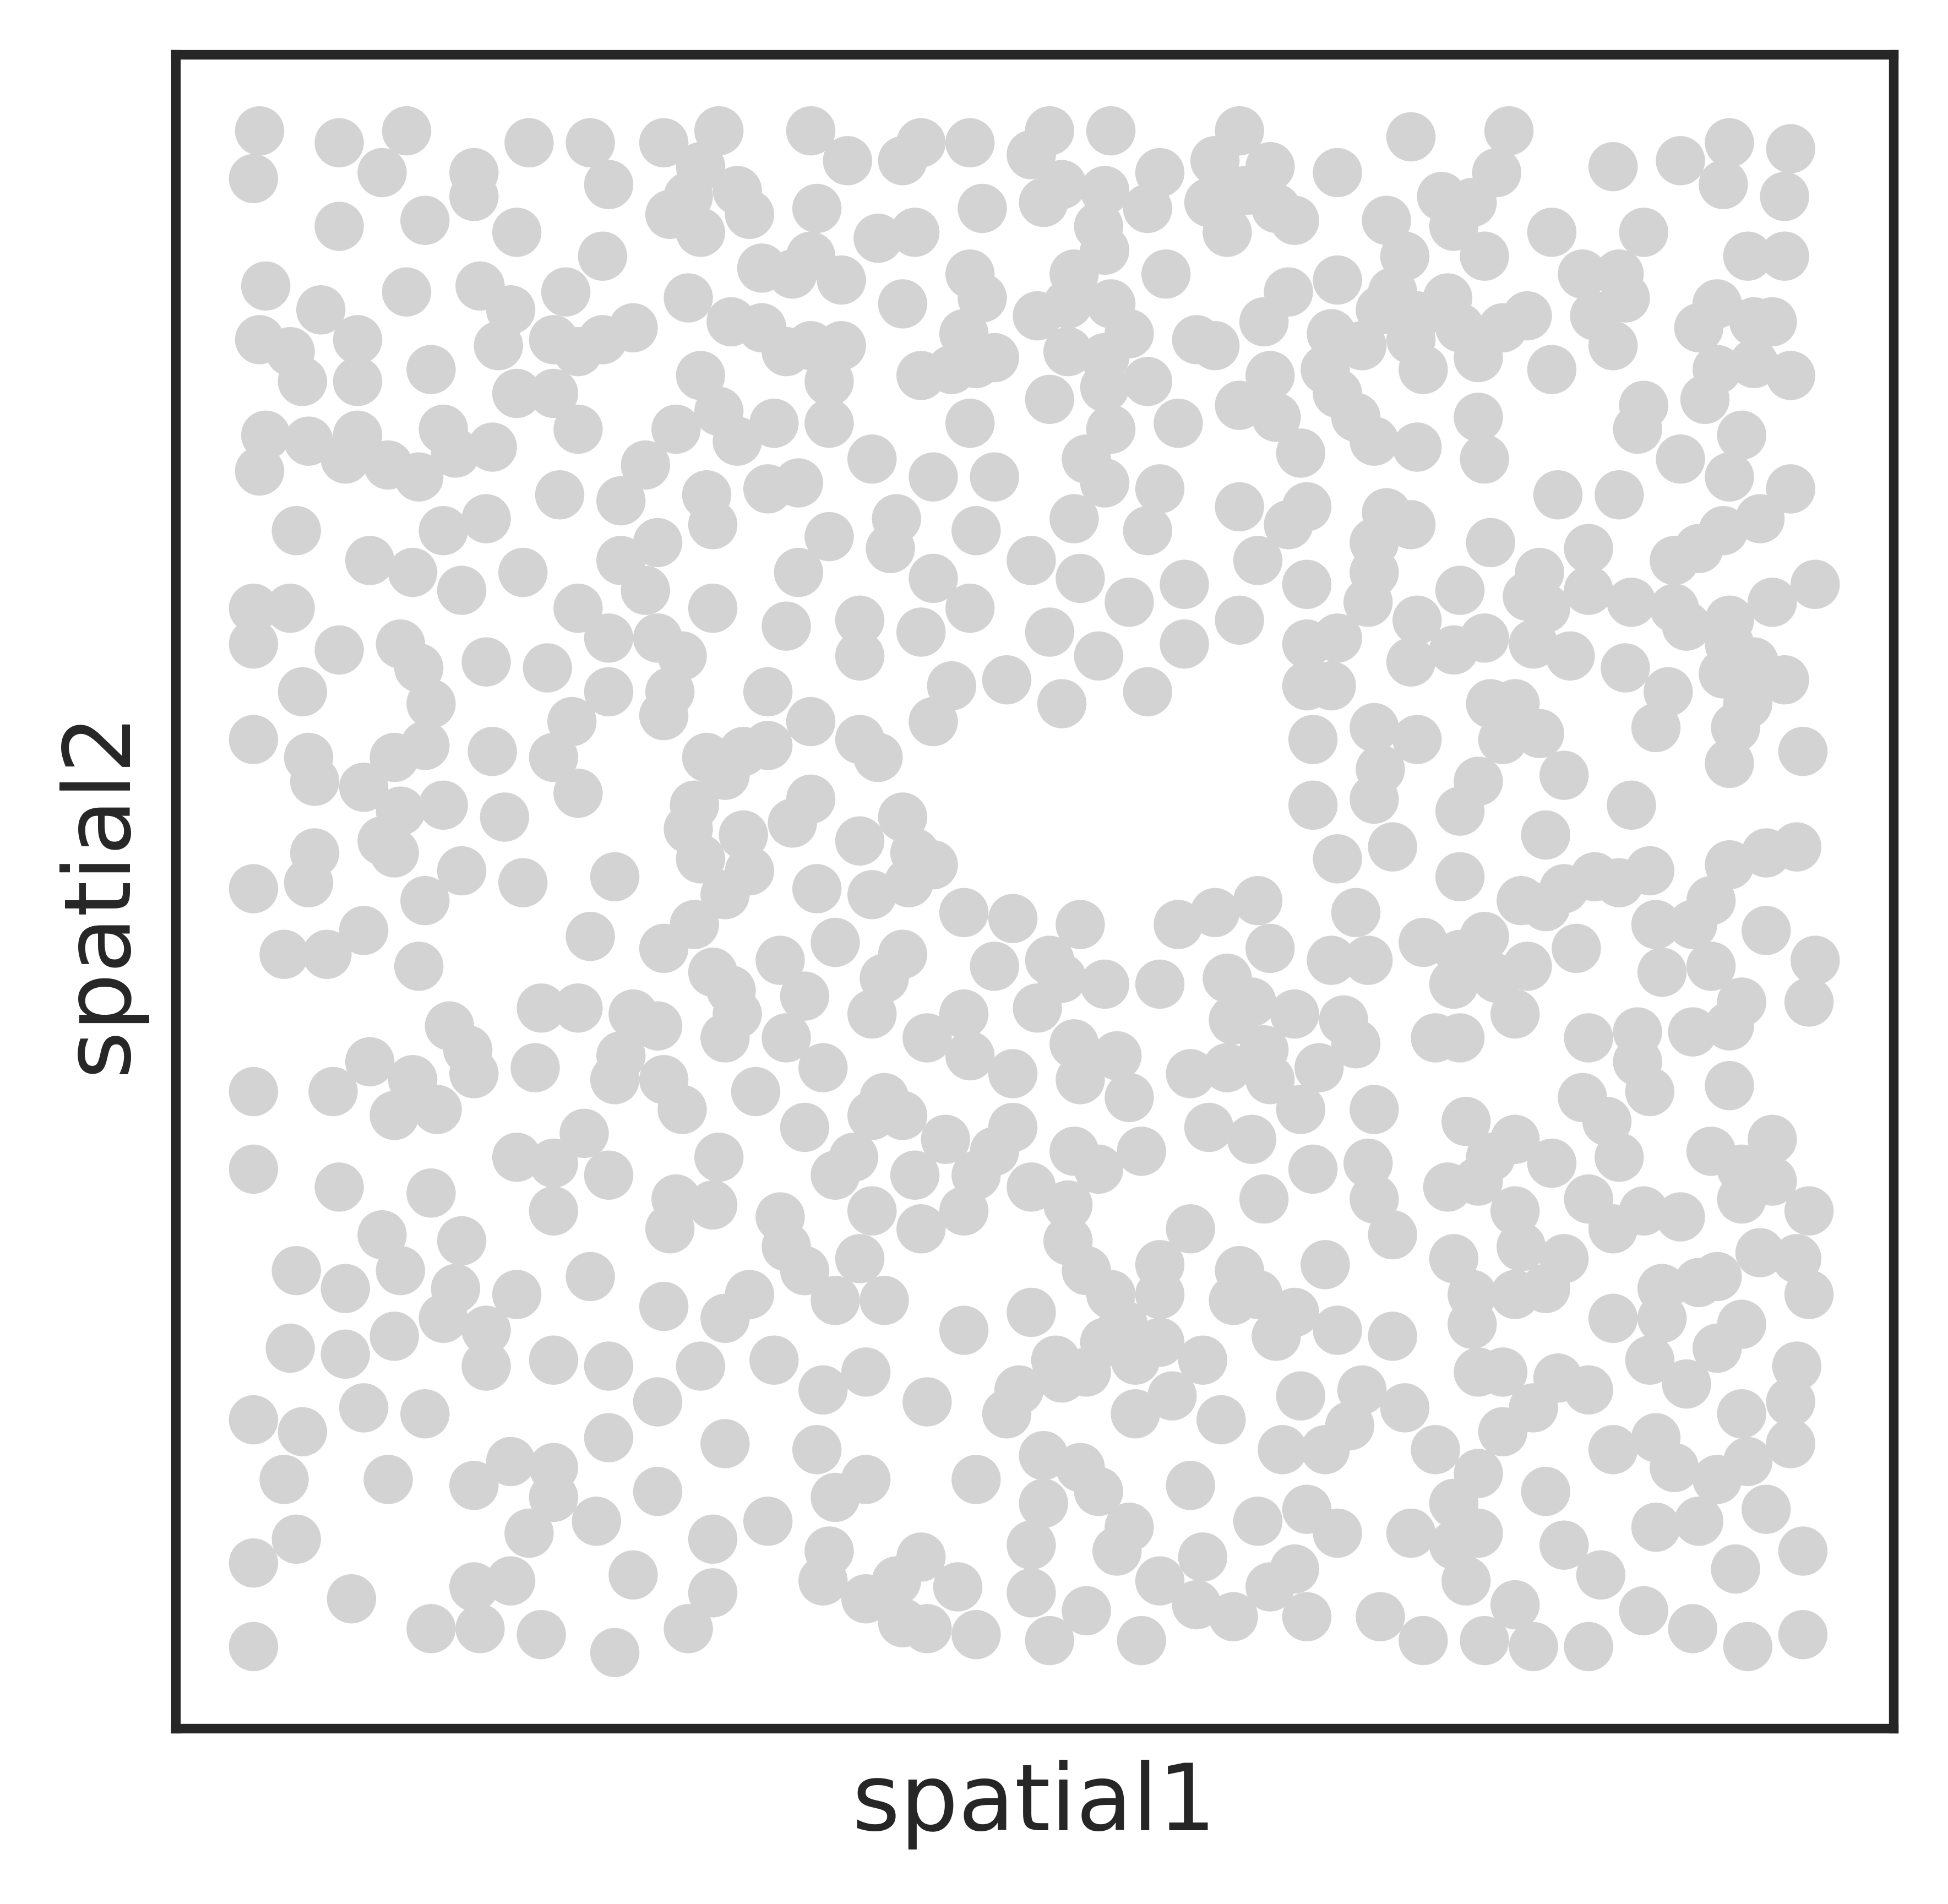

In [8]:
SEAM.pl.Cut(a,method='dot')

## each cell represented as a segmented mask

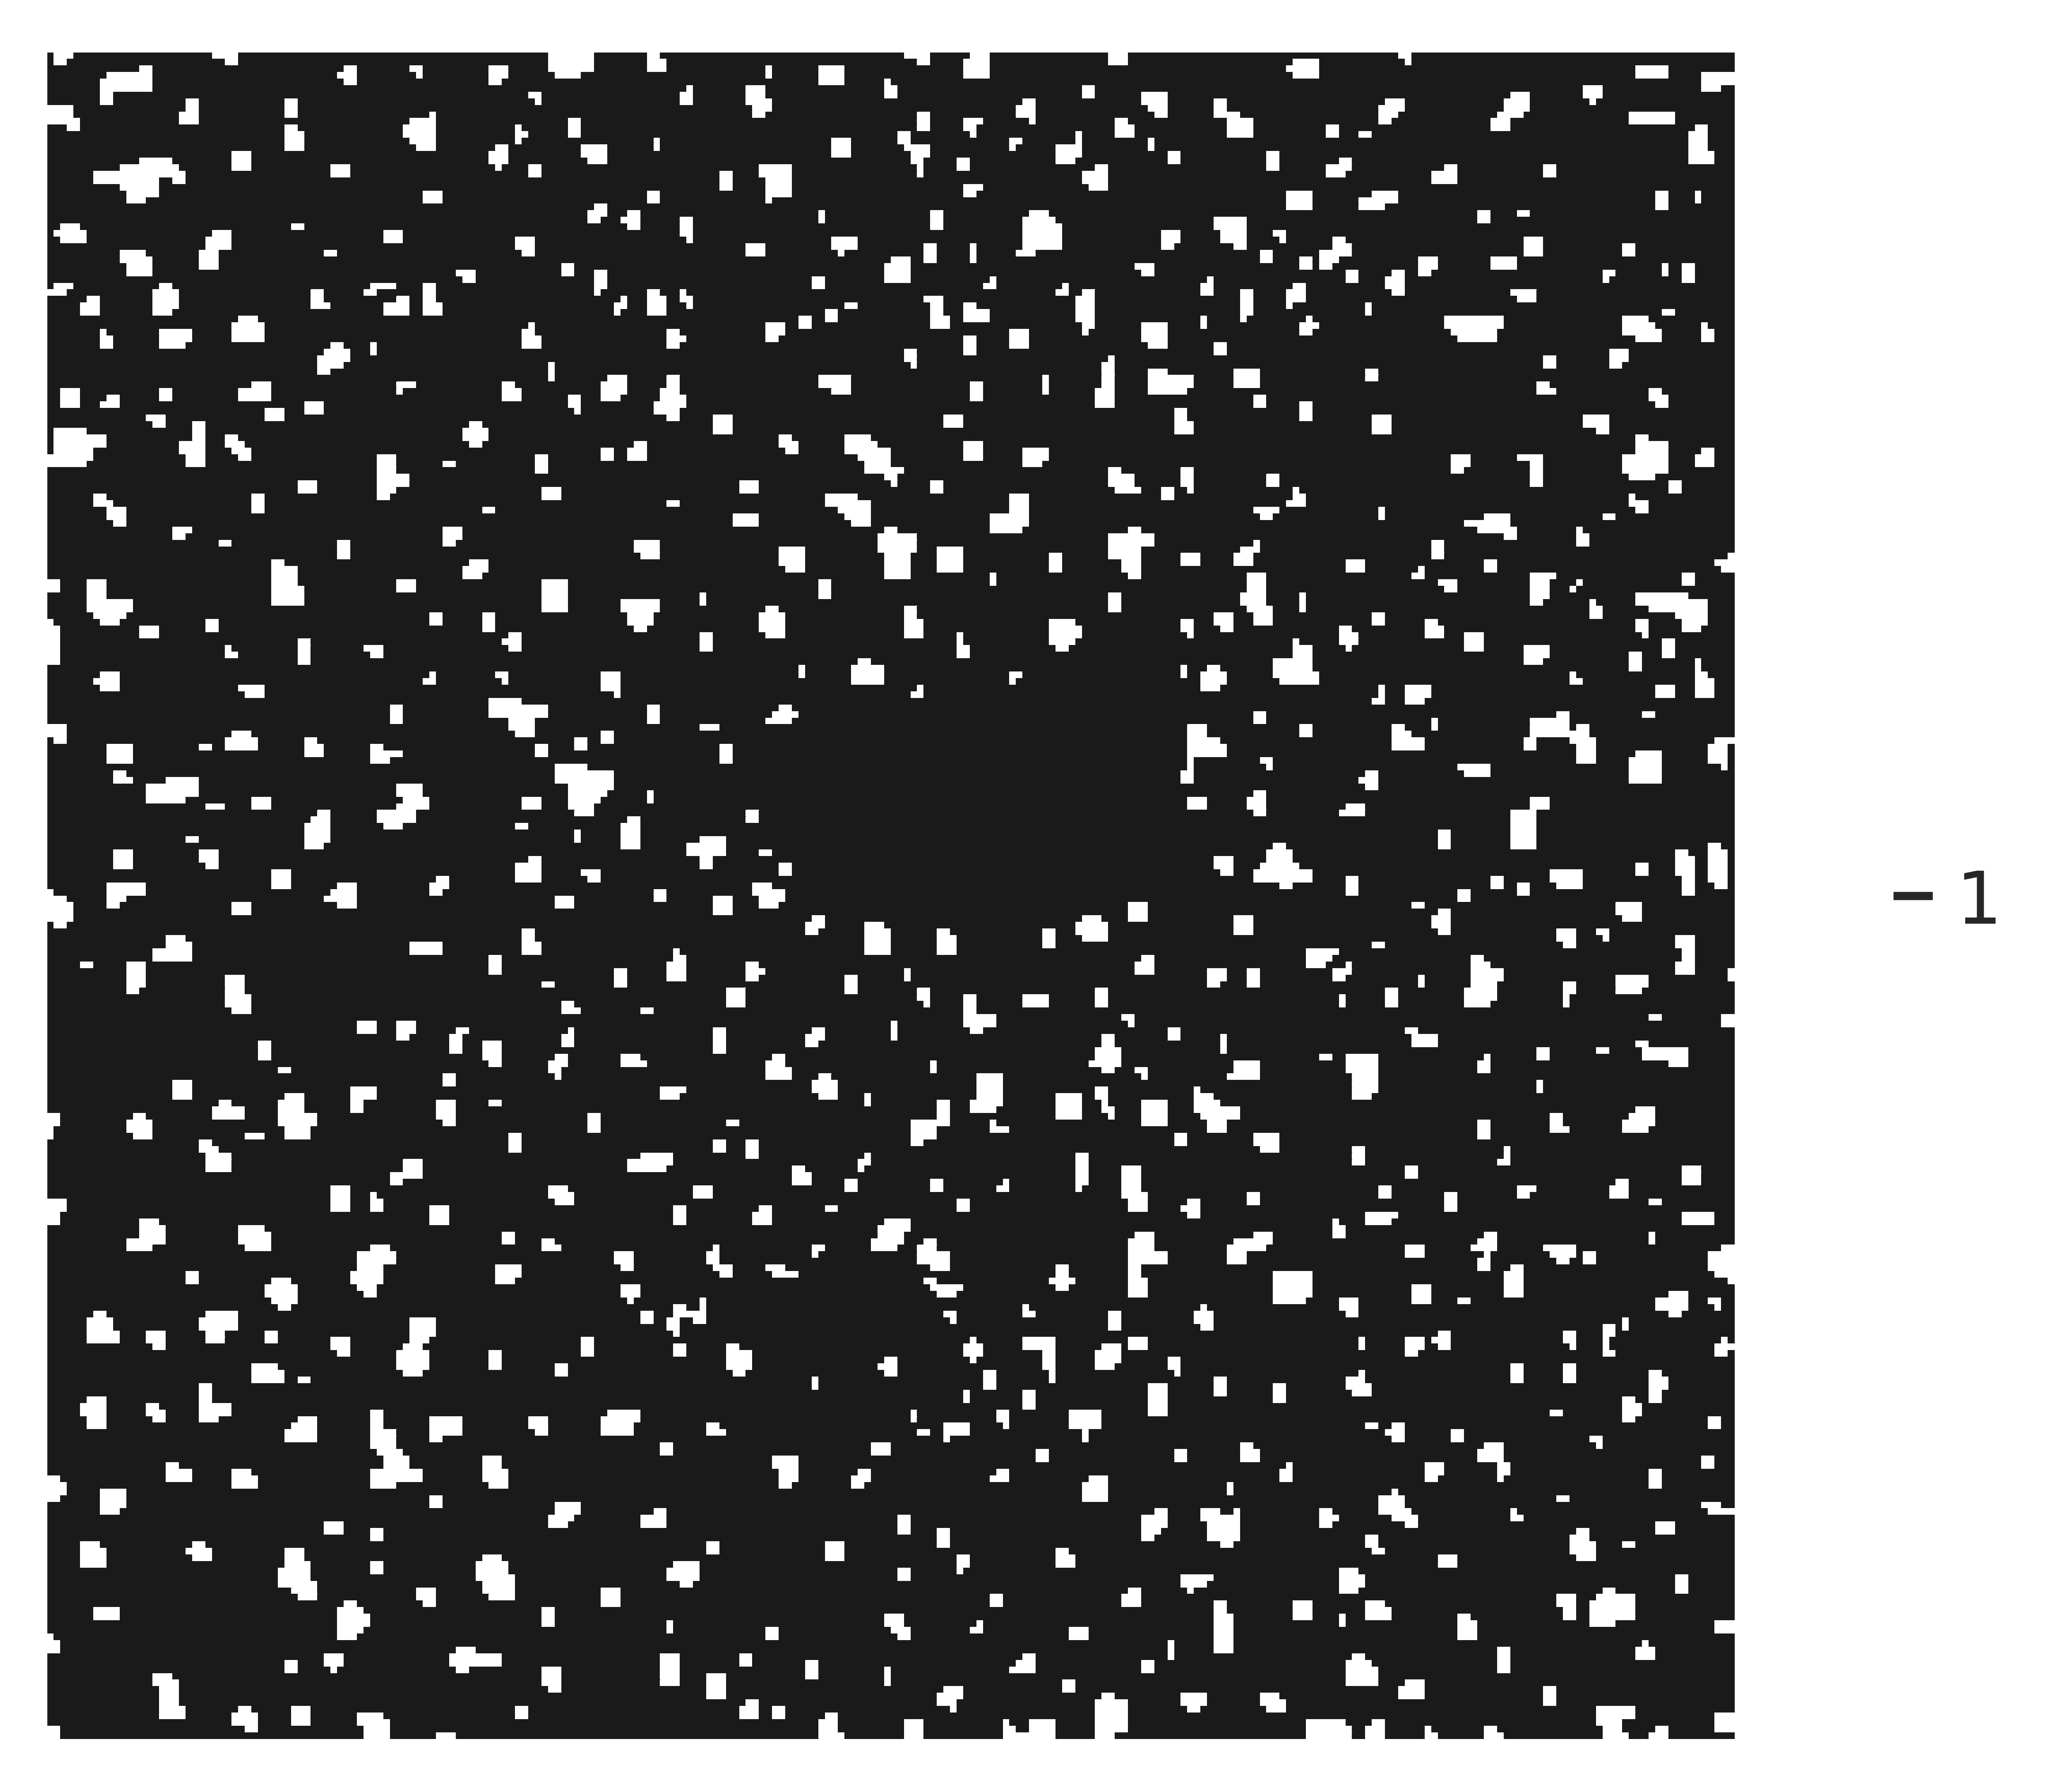

In [9]:
SEAM.pl.Cut(a,method='mask')

# ID&Cluster

### run SIMS-ID with epochs and temperature.

In [23]:
a = SEAM.tl.ID(a,epochs=500,t=5)

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/500
7145/7145 [==============================] - 5s 702us/step - loss: 6.6807 - softmax_loss: 6.6802 - center_loss: 3.9075
Epoch 2/500
7145/7145 [==============================] - 2s 270us/step - loss: 6.3645 - softmax_loss: 6.3636 - center_loss: 6.9196
Epoch 3/500
7145/7145 [==============================] - 2s 257us/step - loss: 6.1112 - softmax_loss: 6.1107 - center_loss: 13.9802
Epoch 4/500
7145/7145 [==============================] - 2s 280us/step - loss: 5.9396 - softmax_loss: 5.9398 - center_loss: 27.7372
Epoch 5/500
7145/7145 [==============================] - 2s 224us/step - loss: 5.8393 - softmax_loss: 5.8400 - center_loss: 38.4637
Epoch 6/500
7145/7145 [==============================] - 1s 181us/step - loss: 5.7793 - softmax_loss: 5.7795 - center_loss: 49.4788
Epoch 7/500
7145/7145 [==============================] - 2s 262us/step - loss: 5.7387 - softmax_loss: 5.7394 - center_loss: 59.3864
Epoch 8/500
7145/7145 [==============================] - 2s 307us/step - loss:

### dump intermediate results

In [77]:
a.write_h5ad('../../data/demo_dump/ID.h5ad')

### run Cluster methods with cell representation method of SIMS-ID

In [ ]:
a = SEAM.tl.Cluster(a,method='SIMLR',cluster_param=5,rep='ID')

(902, 7145) 5
SIMLR highly recommends you to perform PCA first on the data

Please use the in-line function fast_pca on your input



/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/SIMLR/core.py:70: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  t = AnnoyIndex(d)
/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/SIMLR/core.py:75: FutureWarning: The default argument for metric will be removed in future version of Annoy. Please pass metric='angular' explicitly.
  u = AnnoyIndex(d)


### umap embedding with cell representation method of SIMS-ID

In [ ]:
a = SEAM.tl.Umap(a,rep='ID')

### Umap embedding colored coded by SIMLR result

In [ ]:
SEAM.pl.ID(a)

In [ ]:
sc.pl.umap(a,color=['SIMLR','60.28','76.31'])

### spatial single cell map colored by SIMLR

In [ ]:
SEAM.pl.Cluster(a,cls='SIMLR',groups=range(5),method='mask')

### spatial single cell map of particular clusters 

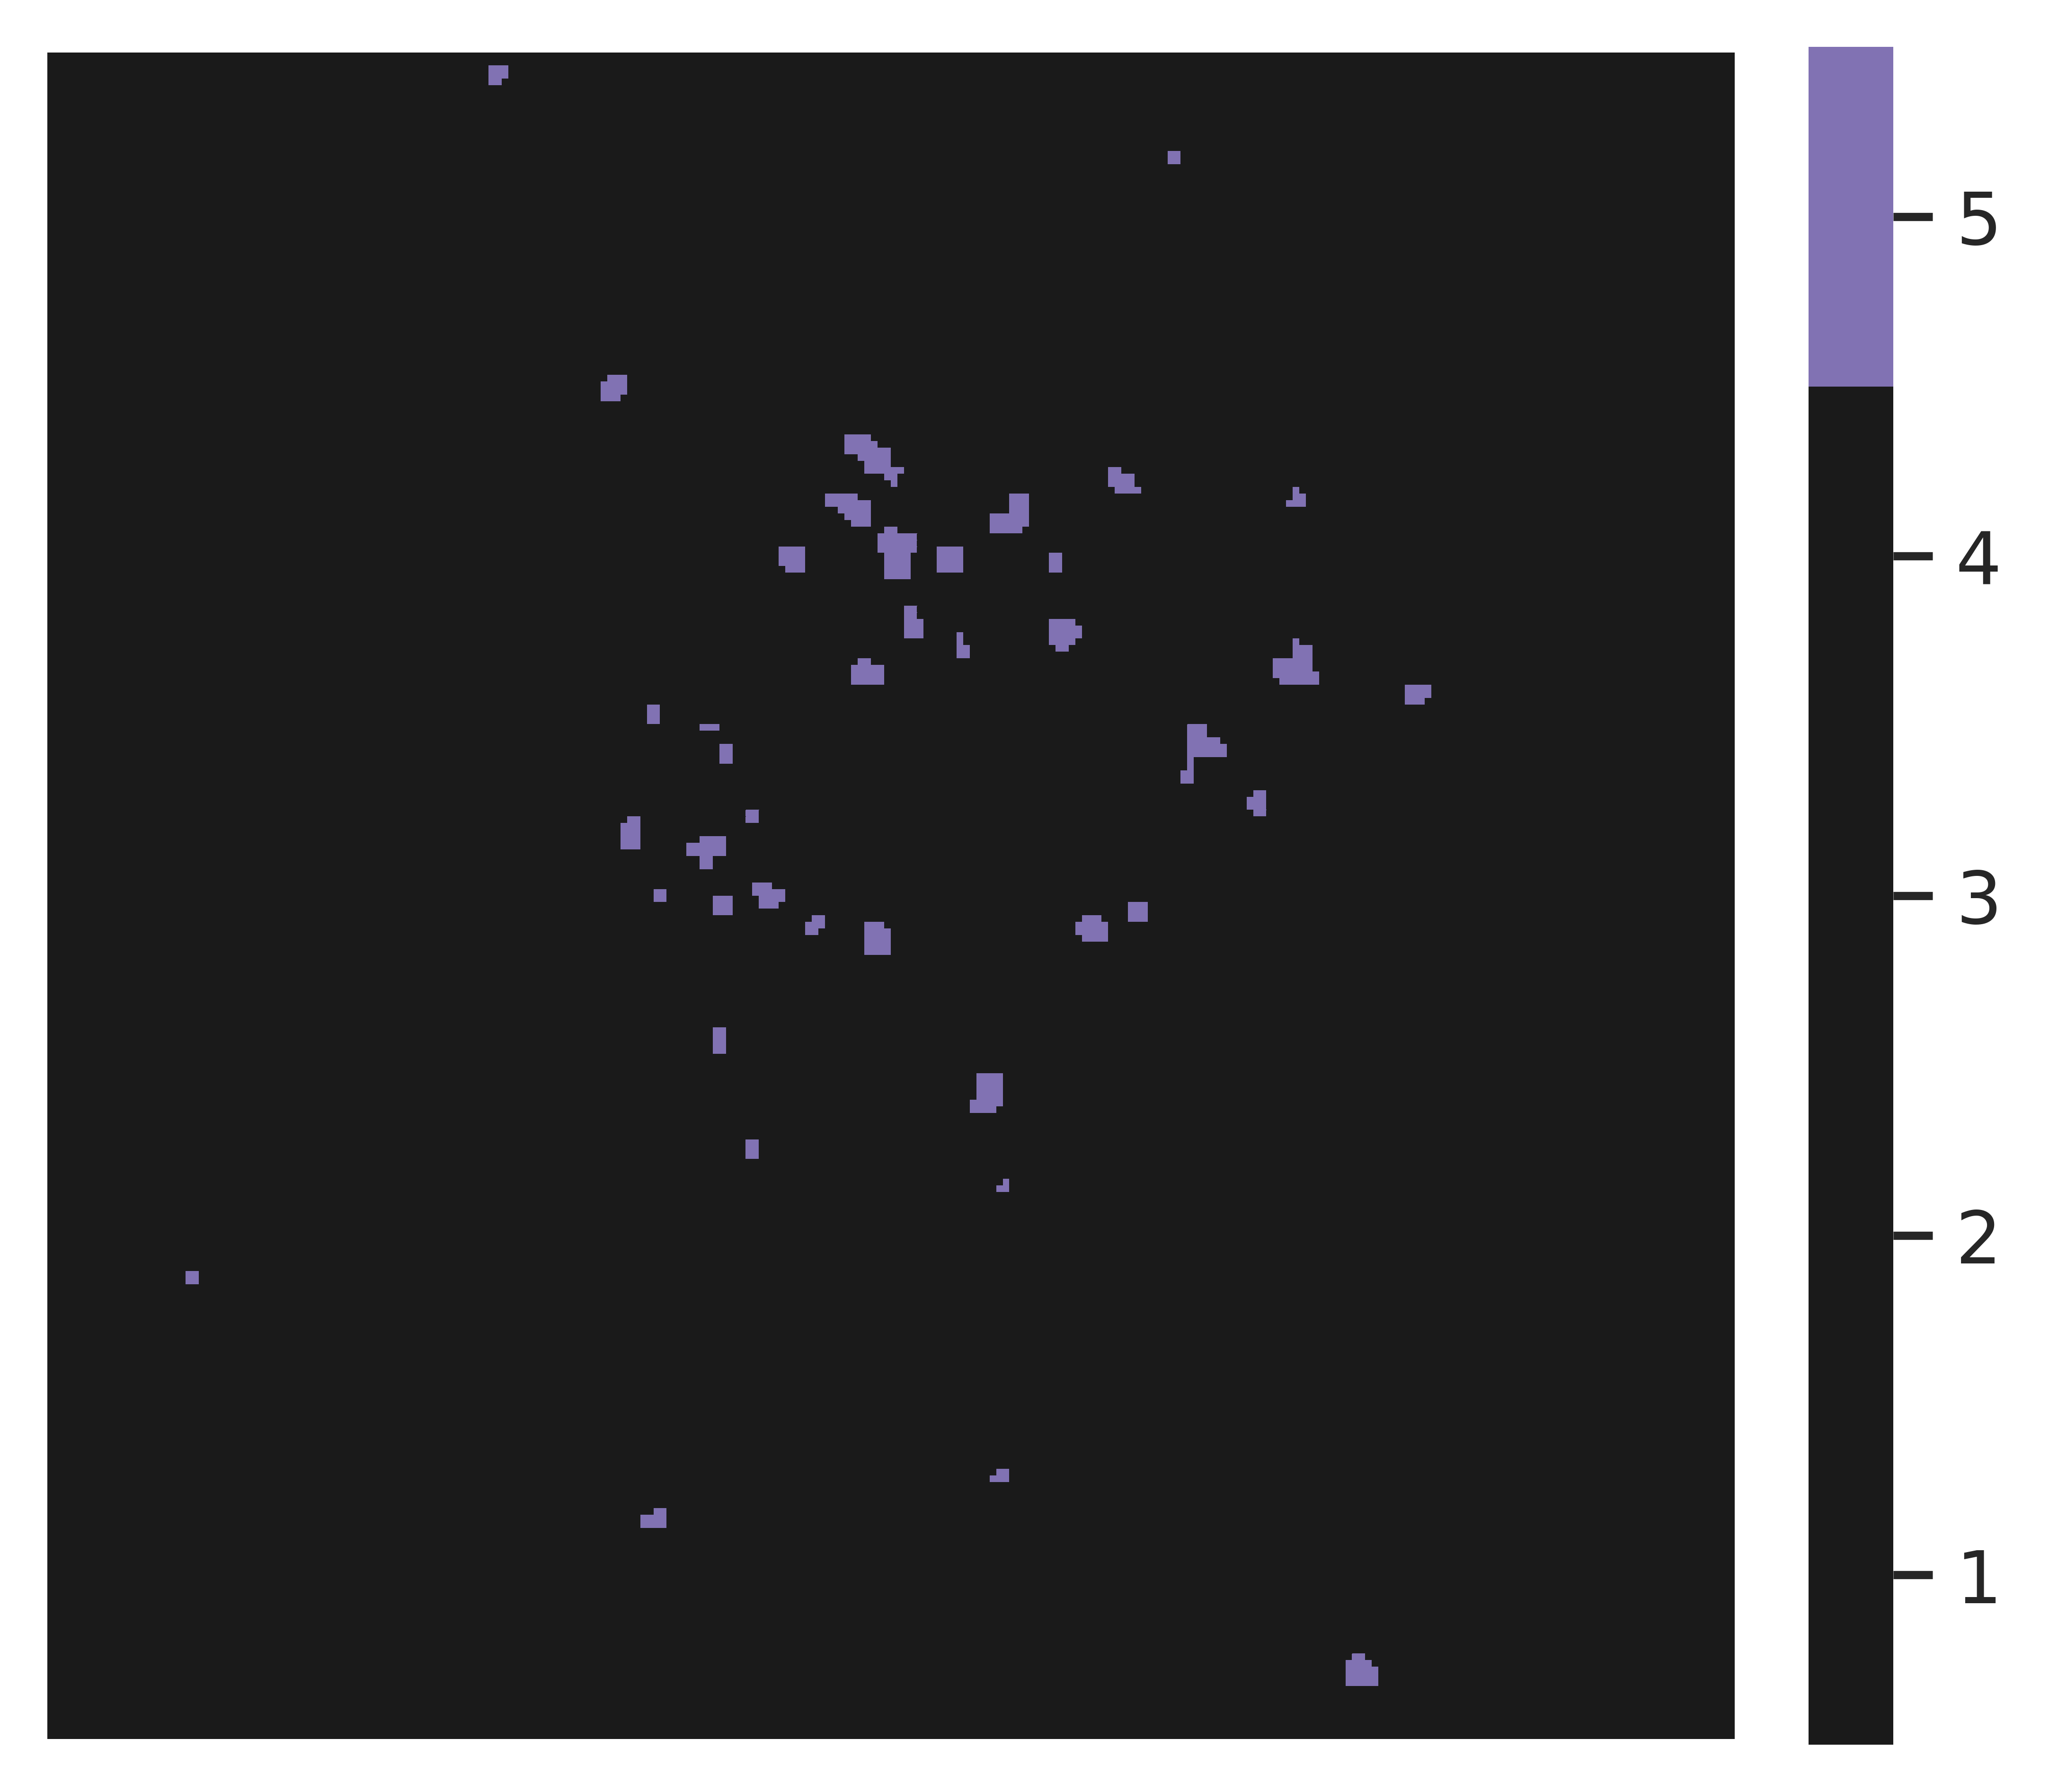

In [75]:
SEAM.pl.Cluster(a,cls='SIMLR',groups=[4],method='mask')

In [16]:
a

AnnData object with n_obs × n_vars = 724 × 244 
    obs: 'SIMLR'
    uns: 'cell_idx', 'cell_pos', 'IMS', 'train_x', 'IMS_Umap', 'neighbors', 'umap', 'SIMLR_colors'
    obsm: 'spatial', 'ID', 'X_umap'
    obsp: 'distances', 'connectivities'